In [ ]:
import catppuccin
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

mpl.style.use(catppuccin.PALETTE.mocha.identifier)

#### Используемые константы

In [109]:
N = int(1e6)
L = 1.0  # длина пробега (среднеквадратичная)
R0 = np.sqrt(N) * L

#### Функция для генерации траекторий случайных блужданий

In [110]:
def random_path(N, L, distr="normal", alpha=3.0):
    # случайные направления
    v = np.random.normal(size=(2, N))
    nv = v / np.sqrt(np.sum(v**2, 0))  # нормировка

    # случайные длины шагов
    if distr == "pareto":
        # распределение Парето (тяжелый хвост)
        steps = L * (np.random.pareto(alpha, N))
    else:
        # нормальное распределение (классическое броуновское движение)
        steps = np.random.normal(scale=L, size=N)
    R = np.cumsum(nv * steps, axis=1)
    return R

#### Непосредственная генерация траекторий и визуализация

In [111]:
def calculate_random_paths(num_paths=5, N=N, L=L, distr="normal", alpha=3.0):
    R = []
    for i in range(num_paths):
        R.append(random_path(N, L, distr, alpha))
    return R


def plot_random_paths(R, distr="normal"):
    plt.rcParams["figure.figsize"] = [10, 10]
    ax = plt.gca()
    plt.axis("equal")

    for graph in R:
        ax.plot(graph[0], graph[1], "-")

    ax.add_patch(Circle((0, 0), R0, color="lavender", fill=False, zorder=10))
    ax.add_patch(Circle((0, 0), 10, color="lavender", zorder=10))
    for graph in R:
        end_x, end_y = graph[0, -1], graph[1, -1]
        ax.plot(end_x, end_y, "ro", markersize=3)

    plt.title(f"Random Walks with {distr.capitalize()} Distribution")
    plt.grid(True)
    plt.show()

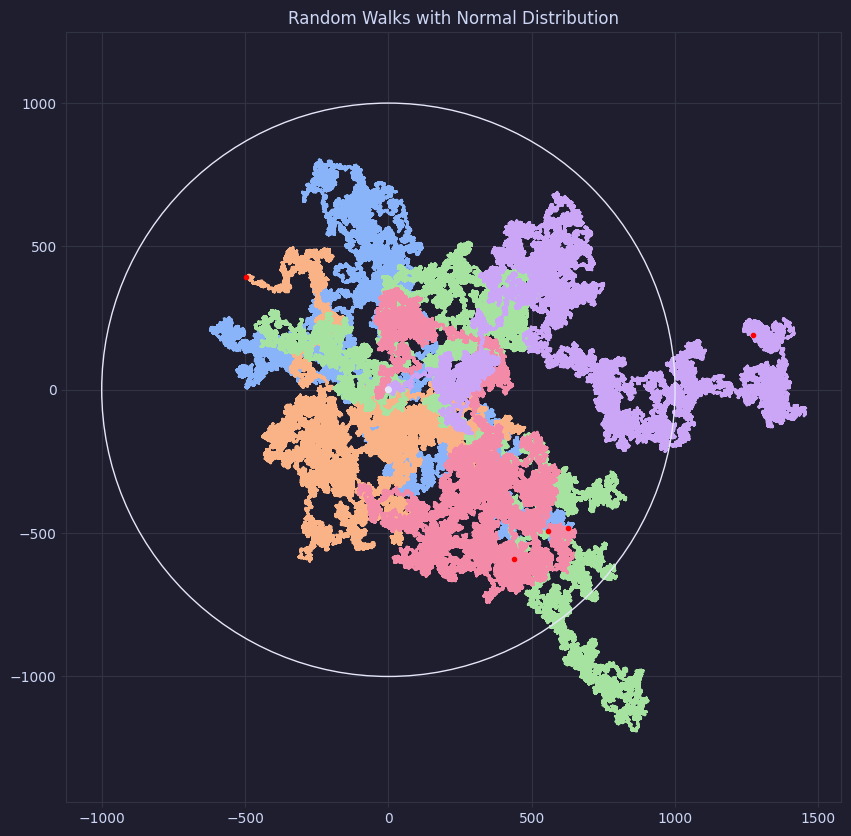

In [112]:
NUM_PATHS = 5
graph = calculate_random_paths(num_paths=NUM_PATHS, distr="normal", alpha=3.0)
plot_random_paths(graph, distr="normal")

#### Строим распределение для большого кол-ва частиц

Траектории рисовать не будем, их слишком много, по такому графику мы ничего не прочитаем.

In [ ]:
def calculate_endpoints(num_paths=1000, N=N, L=L, distr="normal", alpha=3.0):
    endpoints = np.zeros((num_paths, 2))
    for i in range(num_paths):
        path = random_path(N, L, distr, alpha)
        endpoints[i, 0] = path[0, -1]
        endpoints[i, 1] = path[1, -1]
    return endpoints

In [114]:
normal_endpoints = calculate_endpoints(num_paths=1000, distr="normal", alpha=3.0)

In [ ]:
def plot_endpoints(endpoints, distr="normal"):
    plt.rcParams["figure.figsize"] = [10, 10]
    ax = plt.gca()
    plt.axis("equal")

    ax.scatter(endpoints[:, 0], endpoints[:, 1], s=1, color="cyan", alpha=0.5)

    ax.add_patch(Circle((0, 0), R0, color="lavender", fill=False, zorder=10))
    ax.add_patch(Circle((0, 0), 10, color="lavender", zorder=10))

    plt.title(f"Endpoints of Random Walks with {distr.capitalize()} Distribution")
    plt.grid(True)
    plt.show()

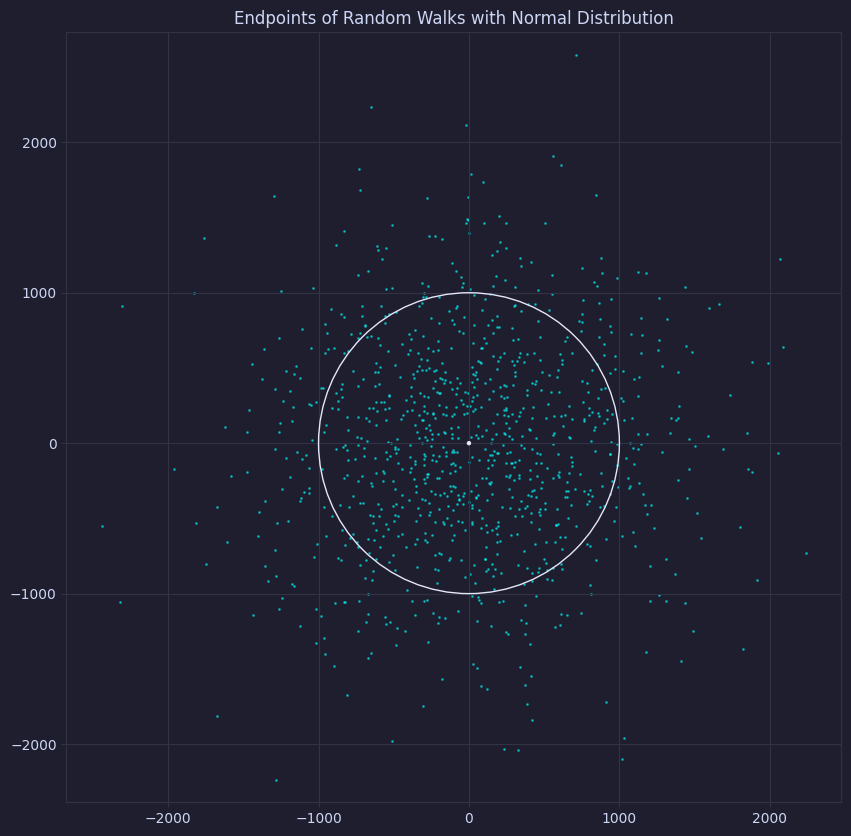

In [ ]:
plot_endpoints(normal_endpoints, distr="normal")

#### Строим график распределения точек в зависимости от расстояния до центра (точки старта)

И сравниваем его с распределением Рэлея

In [ ]:
def calculate_distances(endpoints):
    return np.sqrt(np.sum(endpoints**2, axis=1))

In [119]:
normal_distances = calculate_distances(normal_endpoints)

In [121]:
def plot_distance_histogram(distances, distribution_name="Normal", bins=10, alpha=0.7):
    plt.figure(figsize=(10, 6))
    plt.hist(distances, bins=bins, alpha=alpha, density=True)
    plt.title(
        f"Distribution of Distances from Origin ({distribution_name} Distribution)"
    )
    x = np.linspace(min(distances), max(distances), 1000)
    if distribution_name == "Normal":
        sigma = np.sqrt(N) * L / np.sqrt(2)
        pdf = (x / sigma**2) * np.exp(-(x**2) / (2 * sigma**2))
        plt.plot(x, pdf, "r-", linewidth=2, label="Theoretical Rayleigh distribution")
        plt.axvline(
            x=R0,
            color="r",
            linestyle="--",
            label=f"Expected radius (R₀={R0:.2f})",
        )
        plt.legend()
    plt.xlabel("Distance")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

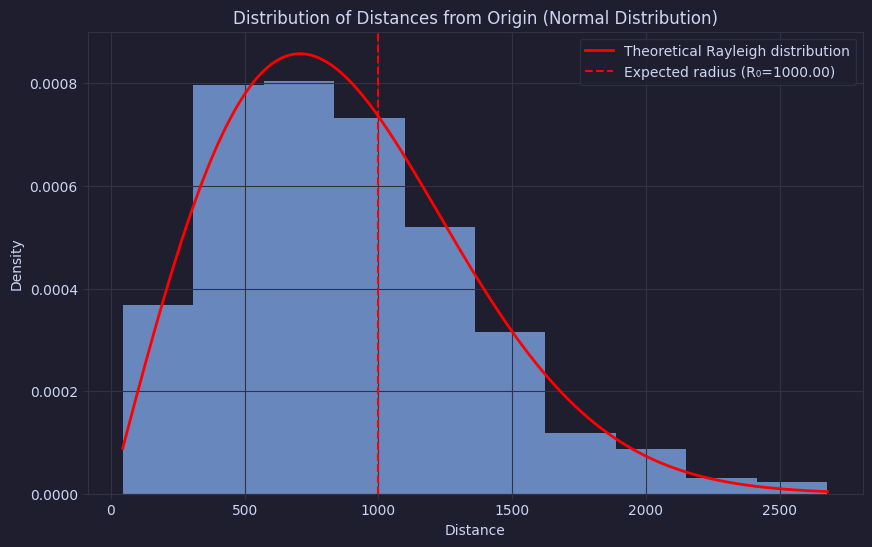

средний квадрат расстояния от начала координат: 994987.01
ожидаемый квадрат расстояния от начала координат: 1000000.00


In [122]:
plot_distance_histogram(normal_distances)
print(
    f"средний квадрат расстояния от начала координат: {np.mean(normal_distances**2):.2f}"
)
print(f"ожидаемый квадрат расстояния от начала координат: {R0**2:.2f}")

#### Дополнение: случайные блуждания по Парето

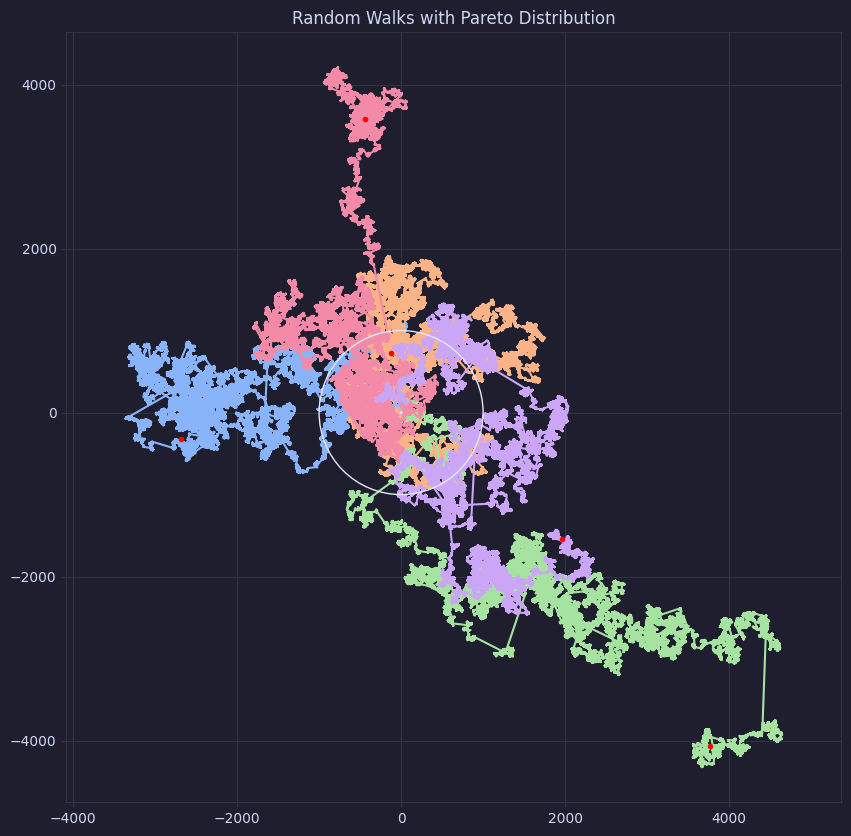

In [123]:
NUM_PATHS = 5

pareto_graph = calculate_random_paths(num_paths=NUM_PATHS, distr="pareto", alpha=2.0)
plot_random_paths(pareto_graph, distr="pareto")

In [124]:
pareto_endpoints = calculate_endpoints(num_paths=1000, distr="pareto", alpha=2.0)

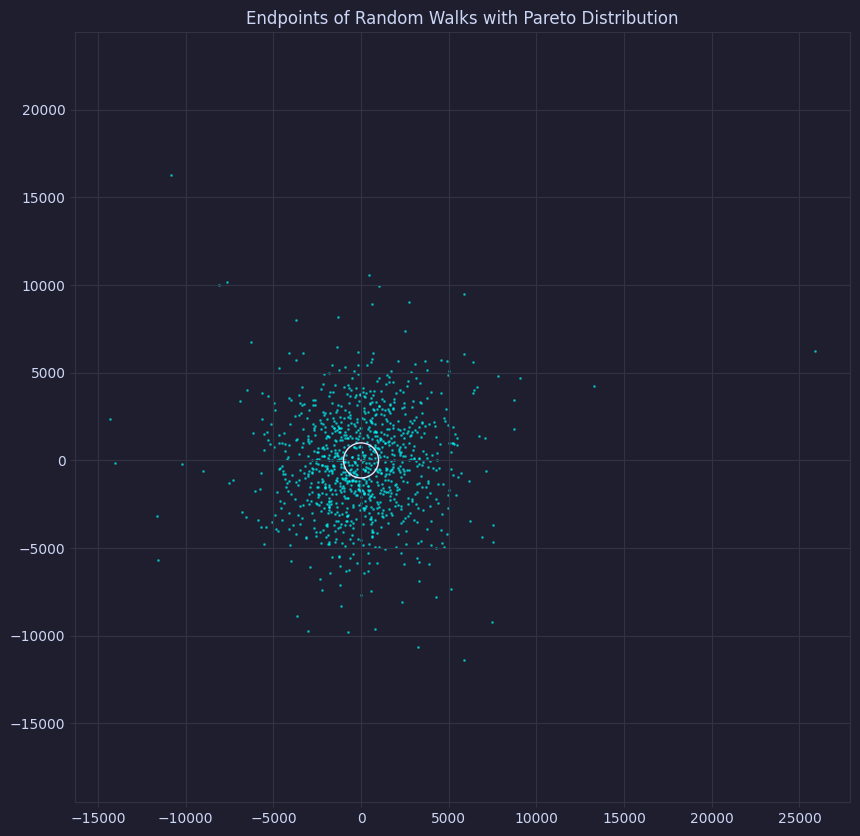

In [125]:
plot_endpoints(pareto_endpoints, distr="pareto")

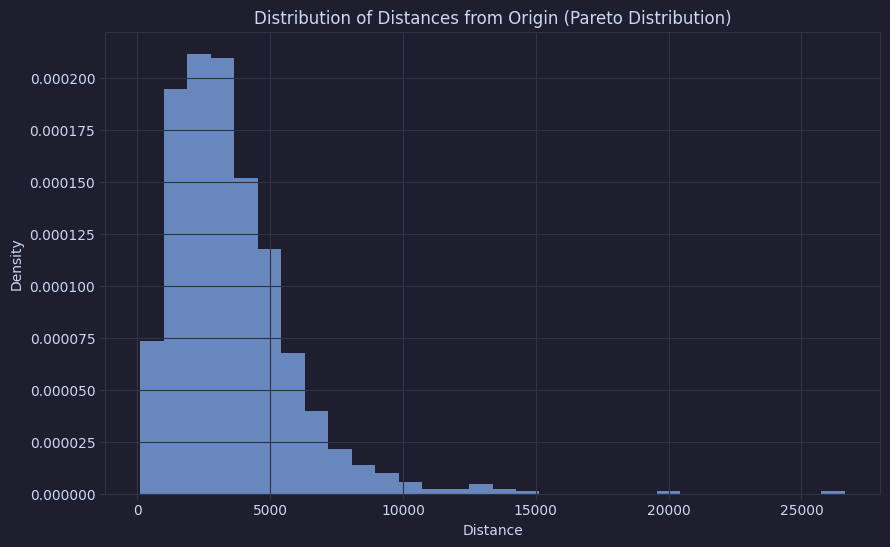

In [126]:
pareto_distances = calculate_distances(pareto_endpoints)
plot_distance_histogram(pareto_distances, bins=30, distribution_name="Pareto")

In [ ]:
def compare_distance_distributions(
    normal_distances, pareto_distances, bins=20, alpha=0.7
):
    plt.figure(figsize=(12, 8))

    min_val = min(min(normal_distances), min(pareto_distances))
    max_val = max(max(normal_distances), max(pareto_distances))

    hist_normal, bins_normal = np.histogram(
        normal_distances, bins=bins, density=True, range=(min_val, max_val)
    )
    hist_pareto, bins_pareto = np.histogram(
        pareto_distances, bins=bins, density=True, range=(min_val, max_val)
    )

    plt.hist(
        normal_distances,
        bins=bins,
        alpha=alpha,
        density=True,
        label="Normal Distribution",
        color="skyblue",
    )
    plt.hist(
        pareto_distances,
        bins=bins,
        alpha=alpha,
        density=True,
        label="Pareto Distribution",
        color="salmon",
    )

    plt.axvline(
        x=R0, color="red", linestyle="--", label=f"Expected radius (R₀={R0:.2f})"
    )

    x = np.linspace(min_val, max_val, 1000)
    sigma = np.sqrt(N) * L / np.sqrt(2)
    pdf = (x / sigma**2) * np.exp(-(x**2) / (2 * sigma**2))
    plt.plot(x, pdf, "g-", linewidth=2, label="Theoretical Rayleigh Distribution")

    plt.title("Comparison of Distance Distributions: Normal vs Pareto")
    plt.xlabel("Distance")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)

    normal_mean = np.mean(normal_distances)
    pareto_mean = np.mean(pareto_distances)
    normal_std = np.std(normal_distances)
    pareto_std = np.std(pareto_distances)

    stats_text = f"Normal: mean={normal_mean:.2f}, std={normal_std:.2f}\nPareto: mean={pareto_mean:.2f}, std={pareto_std:.2f}"
    plt.annotate(
        stats_text,
        xy=(0.75, 0.95),
        xycoords="axes fraction",
        bbox=dict(boxstyle="round", facecolor="black", alpha=0.8),
    )

    plt.show()

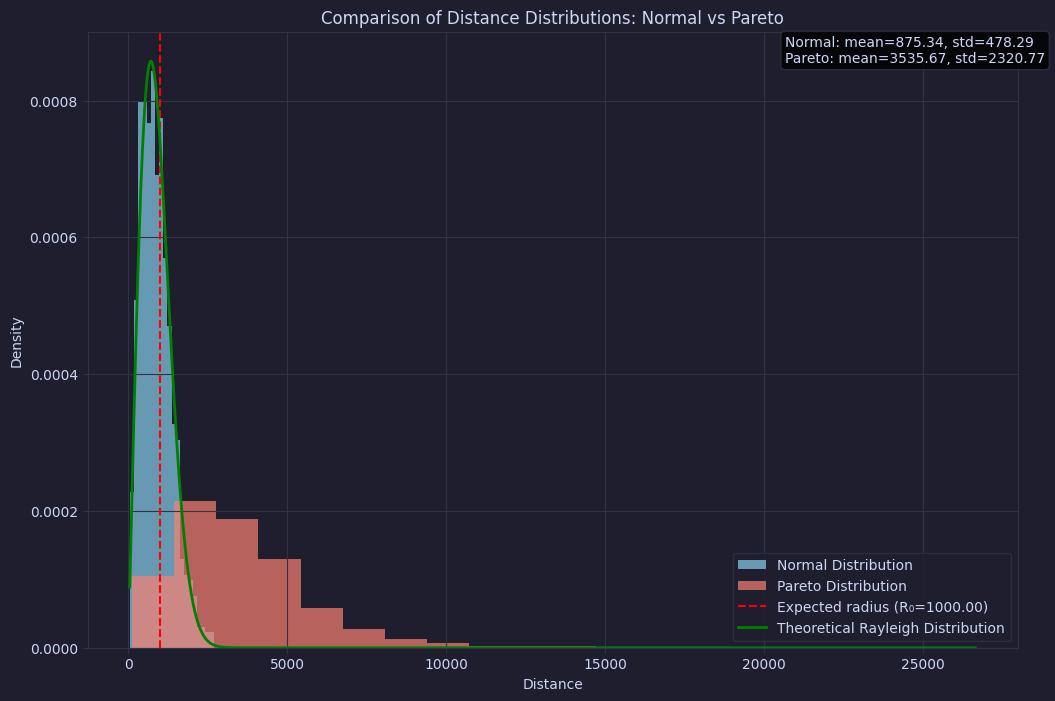

In [128]:
compare_distance_distributions(normal_distances, pareto_distances)